In [3]:
from cloudvolume import CloudVolume
import numpy as np
import matplotlib.pyplot as plt
import napari

In [9]:
for mip in range(5):
    vol = CloudVolume("precomputed://https://dlab-colm.neurodata.io/2022_11_03/8589/axon_mask", mip=mip)
    if (vol.resolution > 10000).any():
        print(vol.resolution)
        print(vol.shape)
        print(mip)
        break

[14640. 14640. 16000.]
(704, 921, 413, 1)
3


In [13]:
vol = CloudVolume("precomputed://https://dlab-colm.neurodata.io/2022_11_03/8589/axon_mask_transformed_25")
vol_atlas = CloudVolume("precomputed://https://open-neurodata.s3.amazonaws.com/ara_2016/sagittal_25um/annotation_25um_2017")

vol.shape


(528, 320, 456, 1)

In [14]:
im = np.squeeze(vol[:,:,:])

Downloading: 100%|██████████| 2550/2550 [00:55<00:00, 45.76it/s]


In [17]:
atlas = np.squeeze(vol_atlas[:,:,:])

Downloading: 100%|██████████| 58/58 [00:09<00:00,  6.25it/s]


In [18]:
im[atlas == 0] = 0

In [19]:
viewer = napari.Viewer(ndisplay=3)
viewer.add_image(im)
viewer.add_labels(atlas)

<Labels layer 'atlas' at 0x16c73b760>

In [ ]:
slice_atlas = np.squeeze(vol_atlas[:,:,600])
slice = np.squeeze(vol[:,:,600])

In [3]:
slice_atlas.shape

(1320, 800)

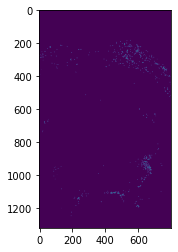

In [6]:
import matplotlib.pyplot as plt

plt.imshow(slice)

In [4]:
dir_base = "precomputed://s3://smartspim-precomputed-volumes/2022_11_03/8589/"
layer_path = dir_base + "axon_mask_test"
vol_mask = CloudVolume(layer_path)

In [20]:
dir_base = "precomputed://s3://smartspim-precomputed-volumes/2022_11_03/8589/"
layer_path = dir_base + "axon_mask_test"

vol = CloudVolume("precomputed://s3://smartspim-precomputed-volumes/2022_11_03/8589/axon_mask")

info = CloudVolume.create_new_info(
    num_channels=1,
    layer_type="image",
    data_type="uint8",  # Channel images might be 'uint8'
    encoding="raw",  # raw, jpeg, compressed_segmentation, fpzip, kempressed
    resolution=vol.resolution,  # Voxel scaling, units are in nanometers
    voxel_offset=vol.voxel_offset,  # x,y,z offset in voxels from the origin
    # mesh            = 'mesh',
    # Pick a convenient size for your underlying chunk representation
    # Powers of two are recommended, doesn't need to cover image exactly
    chunk_size=[32, 32, 32],  # units are voxels
    volume_size=vol.volume_size,  # e.g. a cubic millimeter dataset
)
vol_mask = CloudVolume(layer_path, info=info)
vol_mask.commit_info()

In [20]:
vol_mask[2368:2368+32, 640:6400,1248:1248+32] = 100

Uploading: 100%|██████████| 180/180 [00:02<00:00, 69.69it/s]


In [19]:
39*32

1248